In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()


In [2]:
df = pd.read_csv('../../statistical_rethinking/rethinking/data/UCBadmit.csv',sep=';')

df.rename(columns={'applicant.gender' : 'gender'},inplace=True)
df

,dept,gender,admit,reject,applications
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325
6,C,female,202,391,593
7,D,male,138,279,417
8,D,female,131,244,375
9,E,male,53,138,191
10,E,female,94,299,393


In [3]:
pivot = pd.pivot_table(df,index='dept',columns='gender',values=['admit','applications'],
                       aggfunc=sum,margins=True)

pivot['applications_f'] = pivot[('applications','female')] / pivot[('applications','All')]
pivot['applications_m'] = pivot[('applications','male')] / pivot[('applications','All')]
pivot['f_choice'] = pivot[('applications','female')] / pivot.loc['All',('applications','female')]
pivot['m_choice'] = pivot[('applications','male')] / pivot.loc['All',('applications','male')]
pivot['admit_pct_f'] = pivot[('admit','female')] / pivot[('applications','female')]
pivot['admit_pct_m'] = pivot[('admit','male')] / pivot[('applications','male')]
pivot['admit_pct_tot'] = pivot[('admit','All')] / pivot[('applications','All')]
pivot['female_less'] = pivot['admit_pct_f'] < pivot['admit_pct_m']
pivot

admit             applications             applications_f  \
gender female  male   All       female  male   All                  
dept                                                                
A          89   512   601          108   825   933       0.115756   
B          17   353   370           25   560   585       0.042735   
C         202   120   322          593   325   918       0.645969   
D         131   138   269          375   417   792       0.473485   
E          94    53   147          393   191   584       0.672945   
F          24    22    46          341   373   714       0.477591   
All       557  1198  1755         1835  2691  4526       0.405435   

       applications_m  f_choice  m_choice admit_pct_f admit_pct_m  \
gender                                                              
dept                                                                
A            0.884244  0.058856  0.306577    0.824074    0.620606   
B            0.957265  0.013624  0.208101    0.680000    0.630357   
C            0.354031  0.323161  0.120773    0.340641    0.369231   
D            0.526515  0.204360  0.154961    0.349333    0.330935   
E            0.327055  0.214169  0.070977    0.239186    0.277487   
F            0.522409  0.185831  0.138610    0.070381    0.058981   
All          0.594565  1.000000  1.000000    0.303542    0.445188   

       admit_pct_tot female_less  
gender                            
dept                              
A           0.644159       False  
B           0.632479       False  
C           0.350763        True  
D           0.339646       False  
E           0.251712        True  
F           0.064426       False  
All         0.387760        True

Text(0, 0.5, 'ratio applications,admissions')

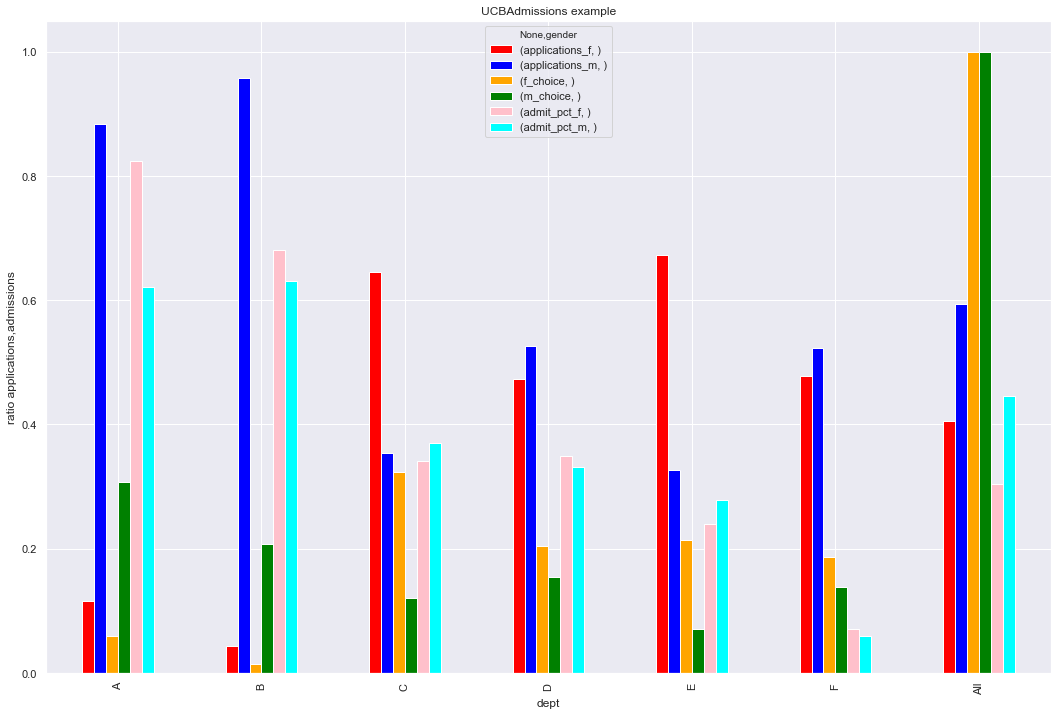

In [4]:
pivot[['applications_f','applications_m','f_choice','m_choice','admit_pct_f','admit_pct_m']].plot.bar(figsize=(18,12),
                                                                                color=['red','blue','orange','green','pink','cyan'])
plt.title('UCBAdmissions example')
plt.ylabel('ratio applications,admissions')

In [5]:
pivot

admit             applications             applications_f  \
gender female  male   All       female  male   All                  
dept                                                                
A          89   512   601          108   825   933       0.115756   
B          17   353   370           25   560   585       0.042735   
C         202   120   322          593   325   918       0.645969   
D         131   138   269          375   417   792       0.473485   
E          94    53   147          393   191   584       0.672945   
F          24    22    46          341   373   714       0.477591   
All       557  1198  1755         1835  2691  4526       0.405435   

       applications_m  f_choice  m_choice admit_pct_f admit_pct_m  \
gender                                                              
dept                                                                
A            0.884244  0.058856  0.306577    0.824074    0.620606   
B            0.957265  0.013624  0.208101    0.680000    0.630357   
C            0.354031  0.323161  0.120773    0.340641    0.369231   
D            0.526515  0.204360  0.154961    0.349333    0.330935   
E            0.327055  0.214169  0.070977    0.239186    0.277487   
F            0.522409  0.185831  0.138610    0.070381    0.058981   
All          0.594565  1.000000  1.000000    0.303542    0.445188   

       admit_pct_tot female_less  
gender                            
dept                              
A           0.644159       False  
B           0.632479       False  
C           0.350763        True  
D           0.339646       False  
E           0.251712        True  
F           0.064426       False  
All         0.387760        True

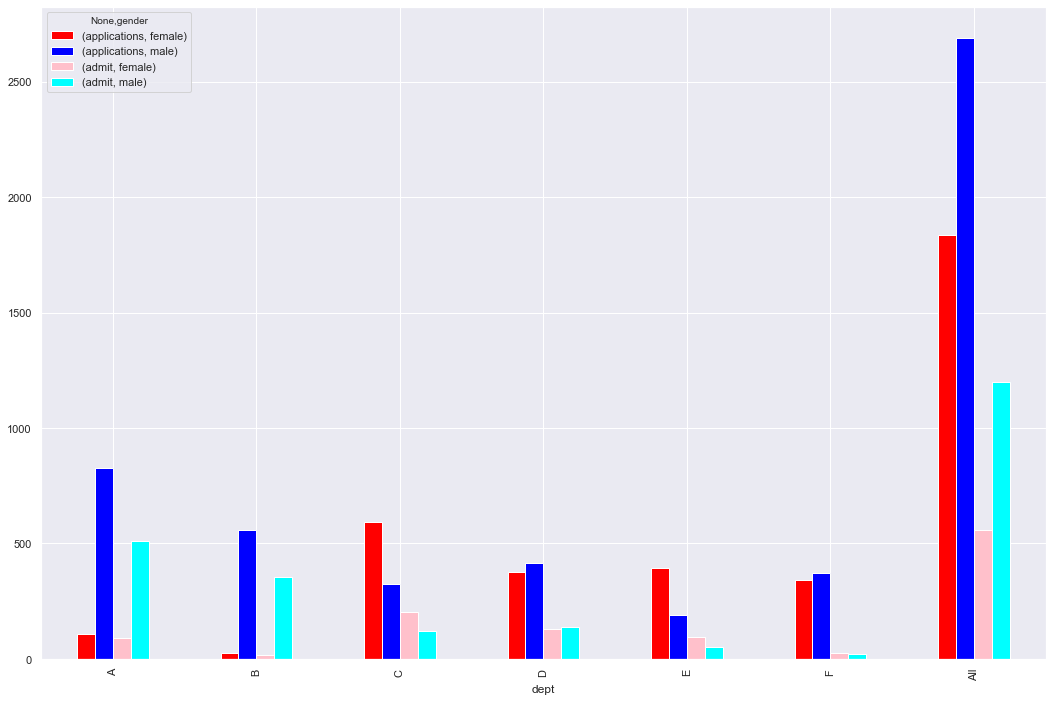

In [6]:
pivot2 = pivot.copy()
pivot.drop([('applications','All'),('admit','All')],axis=1,inplace=True)
pivot[['applications','admit']].plot.bar(stacked=False,figsize=(18,12),color=['red','blue','pink','cyan'])


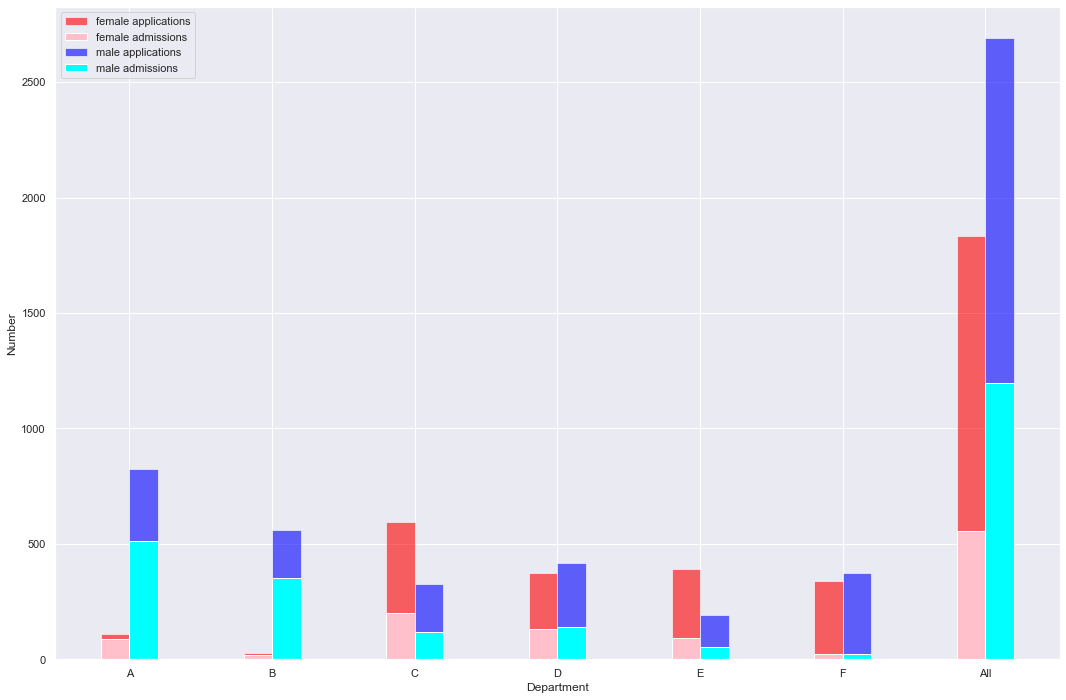

In [7]:
plt.figure(figsize=(18,12))
delta = 0.2
xticks = ['A','B','C','D','E','F','All']

plt.bar(np.arange(len(pivot.index)) - delta/2,pivot[('applications','female')],
        width=delta,color='red',alpha=0.6,label='female applications')

plt.bar(np.arange(len(pivot.index)) - delta/2,pivot[('admit','female')],
        width=delta,color='pink',label='female admissions')

plt.bar(np.arange(len(pivot.index)) + delta/2,pivot[('applications','male')],
        width=delta,color='blue',alpha=0.6,label='male applications')

plt.bar(np.arange(len(pivot.index)) + delta/2,pivot[('admit','male')],
        width=delta,color='cyan',label='male admissions')

plt.xticks(np.arange(len(pivot.index)),xticks)
plt.xlabel('Department')
plt.ylabel('Number')
plt.legend(loc='upper left')

([<matplotlib.axis.XTick at 0x6ffff2446438>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'All')])

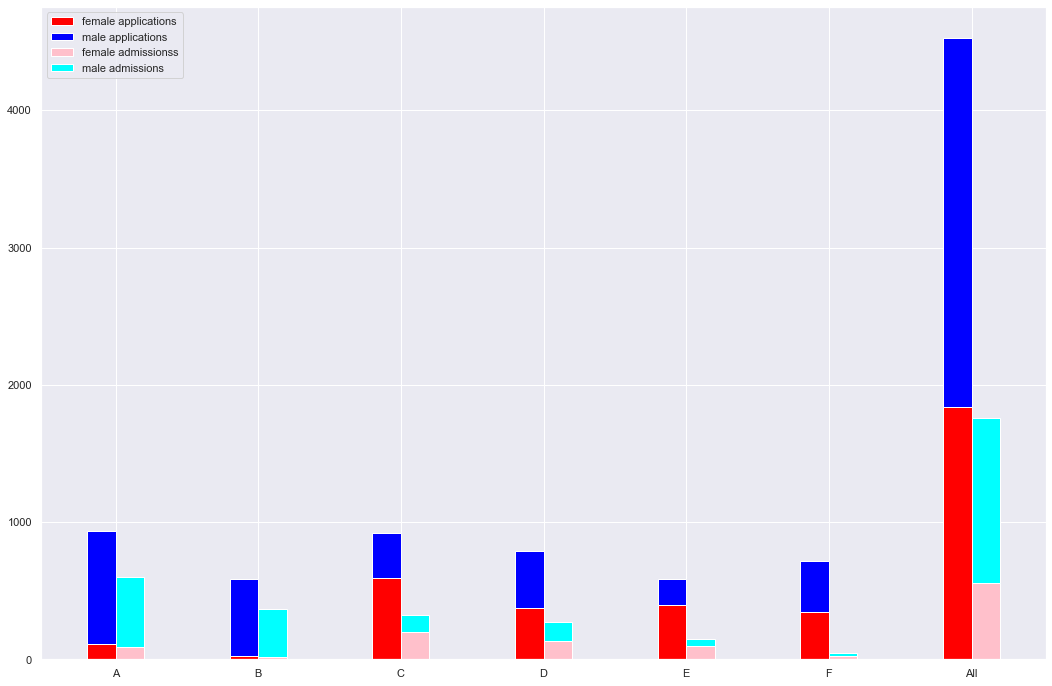

In [8]:
plt.figure(figsize=(18,12))

plt.bar(np.arange(len(pivot2.index)) - delta/2,
        pivot2[('applications','female')],width=delta,color='red',label='female applications')

plt.bar(np.arange(len(pivot2.index)) - delta/2,pivot2[('applications','male')],width=delta,color='blue',
        bottom=pivot2[('applications','female')],label='male applications')

plt.bar(np.arange(len(pivot2.index)) + delta/2,
        pivot2[('admit','female')],width=delta,color='pink',label='female admissionss')

plt.bar(np.arange(len(pivot2.index)) + delta/2,pivot2[('admit','male')],width=delta,color='cyan',
        bottom=pivot2[('admit','female')],label='male admissions')


plt.legend(loc='upper left')
plt.xticks(np.arange(len(pivot.index)),xticks)


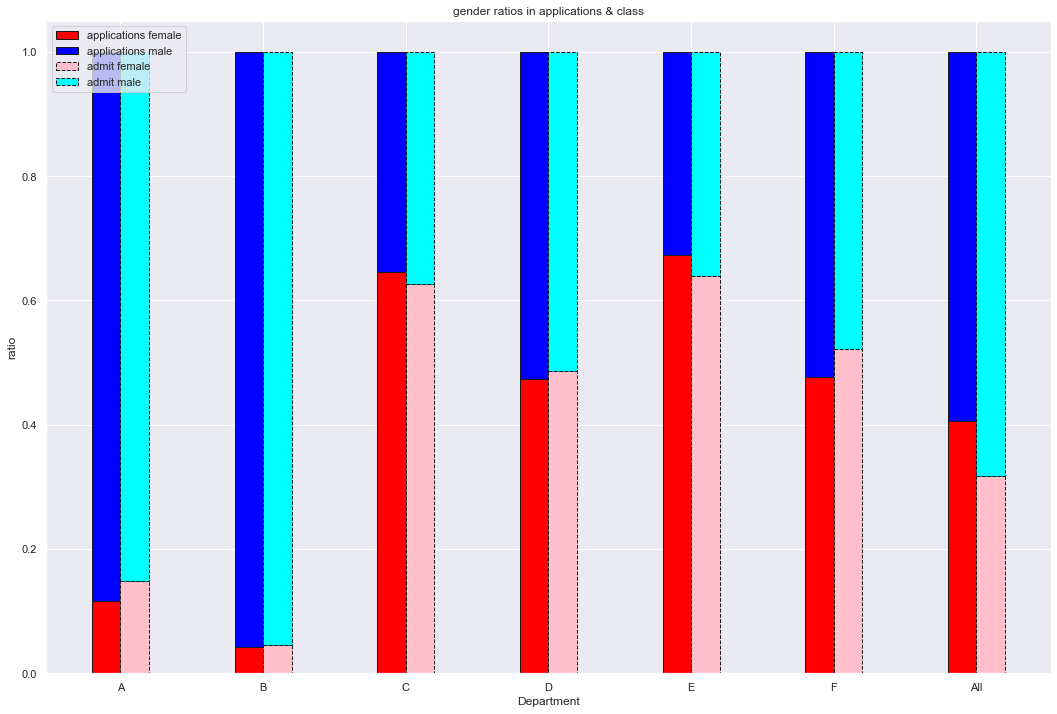

In [9]:
plt.figure(figsize=(18,12))
plt.title('gender ratios in applications & class')

alpha = 1.0

plt.bar(np.arange(len(pivot2.index)) - delta/2,pivot2[('applications','female')] / pivot2[('applications','All')],
        color='red',edgecolor='k',label='applications female',alpha=alpha,width=delta)

plt.bar(np.arange(len(pivot2.index)) - delta/2,pivot2[('applications','male')] / pivot2[('applications','All')],
        edgecolor='k',color='blue',width=delta,
       bottom=pivot2[('applications','female')] / pivot2[('applications','All')],label='applications male',alpha=alpha)

plt.bar(np.arange(len(pivot2.index)) + delta/2,pivot2[('admit','female')] / pivot2[('admit','All')],edgecolor='k',ls='--',
        color='pink',alpha=alpha,label='admit female',width=delta)

plt.bar(np.arange(len(pivot2.index)) + delta/2,pivot2[('admit','male')] / pivot2[('admit','All')],edgecolor='k',ls='--',
        color='cyan',
        alpha=alpha,label='admit male',width=delta,bottom=pivot2[('admit','female')] /pivot2[('admit','All')] )

plt.legend(loc='upper left')
plt.xticks(np.arange(len(pivot.index)),xticks)
plt.ylabel('ratio')
plt.xlabel('Department')
plt.savefig('simpsons_paradox_gender_ratios.jpg',format='jpg')

In [10]:
pivot2

admit             applications             applications_f  \
gender female  male   All       female  male   All                  
dept                                                                
A          89   512   601          108   825   933       0.115756   
B          17   353   370           25   560   585       0.042735   
C         202   120   322          593   325   918       0.645969   
D         131   138   269          375   417   792       0.473485   
E          94    53   147          393   191   584       0.672945   
F          24    22    46          341   373   714       0.477591   
All       557  1198  1755         1835  2691  4526       0.405435   

       applications_m  f_choice  m_choice admit_pct_f admit_pct_m  \
gender                                                              
dept                                                                
A            0.884244  0.058856  0.306577    0.824074    0.620606   
B            0.957265  0.013624  0.208101    0.680000    0.630357   
C            0.354031  0.323161  0.120773    0.340641    0.369231   
D            0.526515  0.204360  0.154961    0.349333    0.330935   
E            0.327055  0.214169  0.070977    0.239186    0.277487   
F            0.522409  0.185831  0.138610    0.070381    0.058981   
All          0.594565  1.000000  1.000000    0.303542    0.445188   

       admit_pct_tot female_less  
gender                            
dept                              
A           0.644159       False  
B           0.632479       False  
C           0.350763        True  
D           0.339646       False  
E           0.251712        True  
F           0.064426       False  
All         0.387760        True